ここではPythonにおけるデータの可視化で非常に使えるPlotlyの入門編として紹介していきます。<br>
matplotlibやseabornはご存じの人も多いですが、多機能かつきれいにグラフ化ができるplotlyも可視化では非常に便利です。

## Plotly Express基礎

plotlyにはexpressというモジュールがあります。<br>
基本的な可視化はexpressを利用することになるので、インポートして使っていきます。<br><br>※Google Colabでは初期で入っています。

In [1]:
import plotly.express as px

### 散布図

見本として使えるデータセットもあるのがplotlyのいいところです。<br>
gapminderというデータセットを呼び出してみます。<br>
dataモジュールから呼び出すことができます。

In [2]:
gapminder = px.data.gapminder()
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


散布図はplot.scatterを使えば、簡単に実装できます。<br>
あとは引数に縦軸と横軸を指定するだけです。

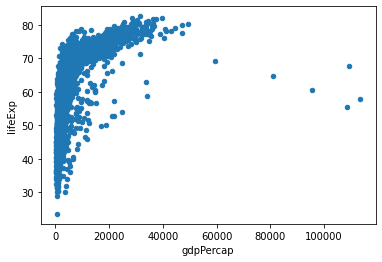

In [3]:
# matplotlibも使っているのでインラインの表記は必要
%matplotlib inline
gapminder.plot.scatter(x='gdpPercap',y='lifeExp')

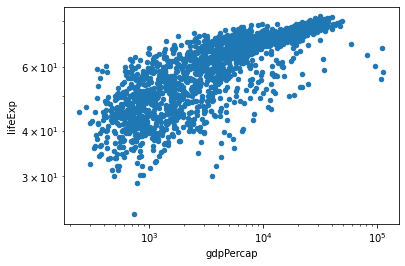

In [4]:
# 引数では対数変換も指定できます。
gapminder.plot.scatter(x='gdpPercap',y='lifeExp',logx=True,logy=True)

### plotlyのモジュールから散布図を描画

上記のようにデータからではなく、plotlyから散布図を描画することもできます。

In [11]:
# scatterの引数にデータ、横軸・縦軸、対数ありORなし（アンダーラインに注意）、ホバーツールで他の情報とも照合できます。
# ホバーツールはカーソルを合わせることで稼働します。
px.scatter(gapminder,x='gdpPercap',y='lifeExp',log_x=True,log_y=True,hover_name='year')

### 散布図で情報の追加

１つのグラフに様々な情報を追加することができます。<br>
上に加えてもう一つの特徴量を色分けしていきます。

In [13]:
# 引数colorを使う
px.scatter(gapminder,x='gdpPercap',y='lifeExp',
           log_x=True,log_y=True,
           hover_name='year',
           color='country')

さらに特徴量ごとにグラフ分割ができます。

In [15]:
# 引数Facet_colを使う
px.scatter(gapminder,x='gdpPercap',y='lifeExp',
           log_x=True,log_y=True,
           hover_name='year',
           facet_col='continent',
           color='country')

## Plotlyに渡すデータ型

plotlyでは様々なデータを可視化できますが、渡すときのデータ型を考慮する必要があります。<br>
以下のデータ型で利用可能です。<br>
- リスト・タプル
- numpy array
- pandas DataFrame

などで利用できます。<br>
ただ、matplotlibやseabornと同じなので、あまり意識せずとも使えることでしょう。

In [16]:
# リストデータ
px.line(x=[1,2,3],y=[5,0,6])

In [22]:
# numpy array
import numpy as np
np.random.seed(123)
array = np.random.rand(100,5)
px.scatter(array,x=0,y=1,color=2)

## グラフの並列表示

グラフの並列表示をするための便利な機能としてファセットというものがあります。<br>
特徴量ごとに散布図を見たいときには非常に便利です。

In [23]:
# データセットの読み込み(チップの支払いに関するデータ)
tips = px.data.tips()
tips.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
px.scatter(
    tips,
    x='total_bill', #支払いの合計金額
    y = 'tip', #チップの金額
    color='size', # サイズで色分け
    facet_row='day', #横軸で天気で分ける
    facet_col='sex' #横軸は性別で分ける
)

## 様々なグラフ表現

上記では散布図を主に取り扱いました。<br>
ただ、plotlyではもちろん他のグラフも使えますので、散布図以外のグラフも使っていきます。

引数はどのグラフも共通して使えるものが多いので、<br>
そのあたりも見ていただきたいと思います。

### 散布図行列 - scatter_matrix

In [26]:
# 散布図を行列で表示
px.scatter_matrix(tips,
                  dimensions=['total_bill','tip','sex'],#行列の特徴量
                  color='day',#色付け
                  symbol='sex')#散布図の形状の分割

### 折れ線グラフ - line

In [27]:
# 折れ線グラフを表示
px.line(gapminder[gapminder['continent'] == 'Asia'],x='year',y='gdpPercap',color='country')

### 棒グラフ - bar

In [28]:
# 棒グラフを表示
px.bar(gapminder[gapminder['continent'] == 'Asia'],x='year',y='gdpPercap',color='country')

In [29]:
# チップのデータでも実装
px.bar(tips,x='sex',y='total_bill',color='day')

### 箱ひげ図 - box ＆ ヴァイオリン図 - violin

In [30]:
#　箱ひげ図の表示
px.box(tips,x='time',y='total_bill')

In [31]:
# ヴァイオリン図の表示
px.violin(tips,x='time',y='total_bill')

### ヒストグラム - histgram

In [32]:
# ヒストグラムの表示
px.histogram(tips,x='total_bill')

In [34]:
## 2つを重ねて表示
px.histogram(tips,x='total_bill',color='sex') #　色で分割を指定

### 円グラフ - pie

In [35]:
px.pie(tips,names='day',values='tip')

## Plotlyで便利なグラフ

これまでは従来の可視化ライブラリでもできるものを上げていきました。<br>
ここからはPlotlyだと簡単に可能になる複雑なグラフを紹介していきます。

### 三角図 - scatter_ternary

In [47]:
# 三角図を表示
df = px.data.election()
fig = px.scatter_ternary(df, a="Joly", b="Coderre", c="Bergeron")
fig.show()

### 3D散布図 - scatter_3d

In [53]:
# x,y,zで三次元の特徴量を指定
# ドラックで向きを変えられます。
px.scatter_3d(gapminder,x='year',y='lifeExp',z='continent',color='country')

## まとめ

Plotlyは以下の特徴から非常にお勧めできます。
- グラフがきれい
- 簡単なコーディング

特に従来のモデルでは面倒なグラフが簡単に書けるので、EDA等で有効活用していきたいです。